## Project for Machine Learning and Statistics module
#### Hayley Doherty G00387849
---

Create a web service that makes predictions of wind turbine power based on wind speed values.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


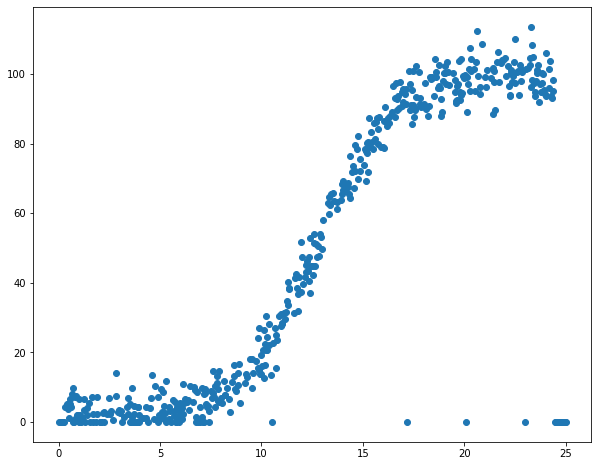

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.show()

In [5]:
import sklearn.cluster as skcl

In [6]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

NameError: name 'KMeans' is not defined

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
kmeans = skcl.KMeans(n_clusters=3, random_state = 0).fit(df)
centroids = kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,

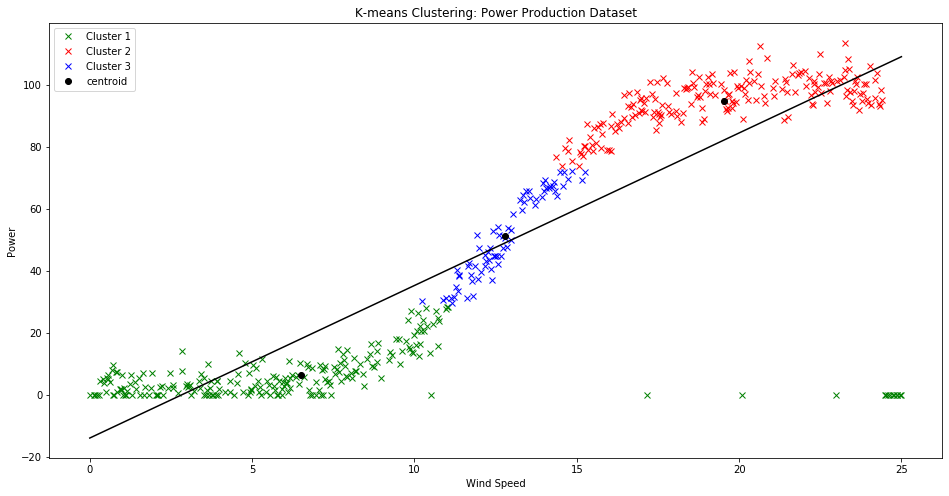

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df.iloc[:,0][kmeans.labels_ == 0], df.iloc[:,1][kmeans.labels_ == 0], 'gx', label="Cluster 1")
plt.plot(df.iloc[:,0][kmeans.labels_ == 1], df.iloc[:,1][kmeans.labels_ == 1], 'rx', label="Cluster 2")
plt.plot(df.iloc[:,0][kmeans.labels_ == 2], df.iloc[:,1][kmeans.labels_ == 2], 'bx', label="Cluster 3")
plt.plot(centroids[:, 0], centroids[:, 1], 'ko', label='centroid')

x = df.iloc[:,0]
y = df.iloc[:,1]
m, c = np.polyfit(x, y, 1)
plt.plot(x, m * x + c, 'k-')
plt.title("K-means Clustering: Power Production Dataset")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [26]:
newvals = np.array([[20, 15], [20, 80]])
predictions = kmeans.predict(newvals)
predictions

array([0, 1])

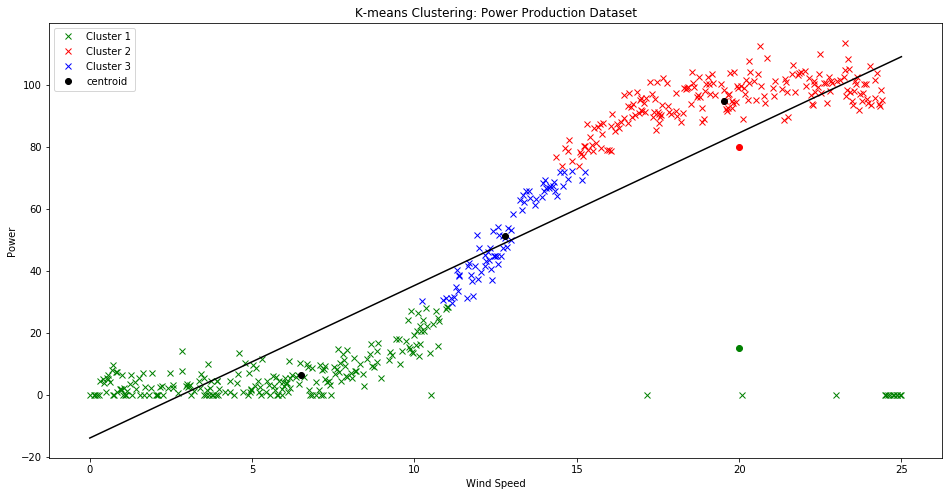

In [27]:
plt.figure(figsize=(16,8))
plt.plot(df.iloc[:,0][kmeans.labels_ == 0], df.iloc[:,1][kmeans.labels_ == 0], 'gx', label="Cluster 1")
plt.plot(df.iloc[:,0][kmeans.labels_ == 1], df.iloc[:,1][kmeans.labels_ == 1], 'rx', label="Cluster 2")
plt.plot(df.iloc[:,0][kmeans.labels_ == 2], df.iloc[:,1][kmeans.labels_ == 2], 'bx', label="Cluster 3")
plt.plot(centroids[:, 0], centroids[:, 1], 'ko', label='centroid')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1], 'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1], 'ro')
x = df.iloc[:,0]
y = df.iloc[:,1]
m, c = np.polyfit(x, y, 1)
plt.plot(x, m * x + c, 'k-')
plt.title("K-means Clustering: Power Production Dataset")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [7]:
import sklearn.neighbors as nei

In [8]:
knn = nei.KNeighborsClassifier(n_neighbors = 5)

In [14]:
#pd.DataFrame(df).to_numpy()
inputs = np.array(df['speed'])
outputs = np.array(df['power'])
inputs = inputs.reshape(-1, 1)


In [15]:
knn.fit(inputs, outputs)

ValueError: Unknown label type: 'continuous'